In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
data.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
10,11,66.1,5.8,24.2,8.6
99,100,135.2,41.7,45.9,17.2
144,145,96.2,14.8,38.9,11.4
118,119,125.7,36.9,79.2,15.9
110,111,225.8,8.2,56.5,13.4


# Explore Data & Drop Unnecessary Column

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visulize Data

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


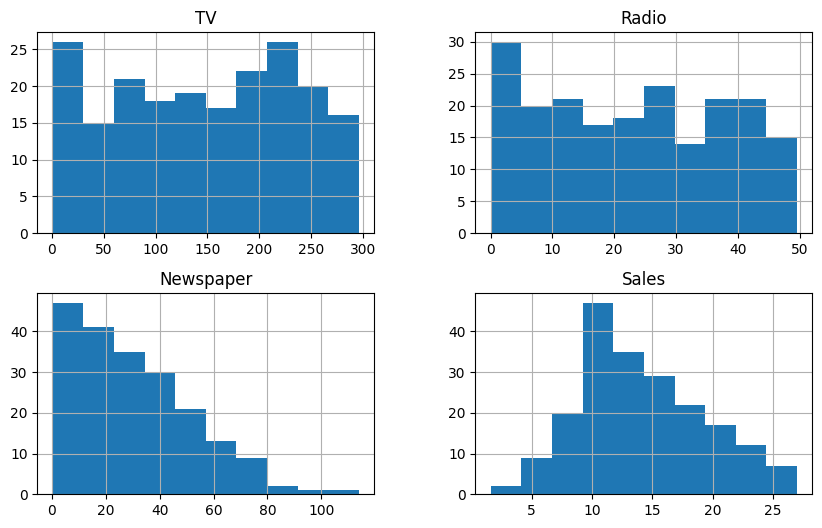

In [8]:
data.hist(figsize=(10,6))
plt.show()

<Figure size 1000x600 with 0 Axes>

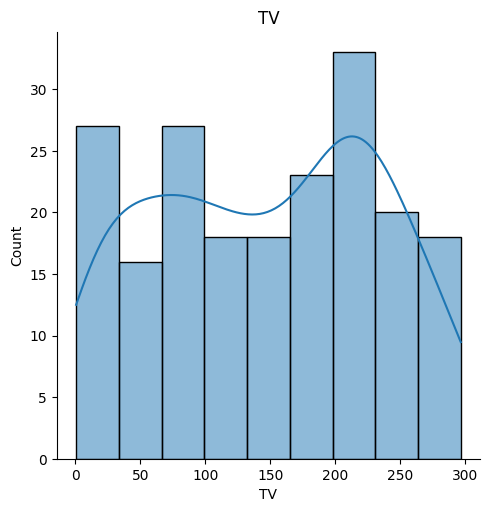

<Figure size 1000x600 with 0 Axes>

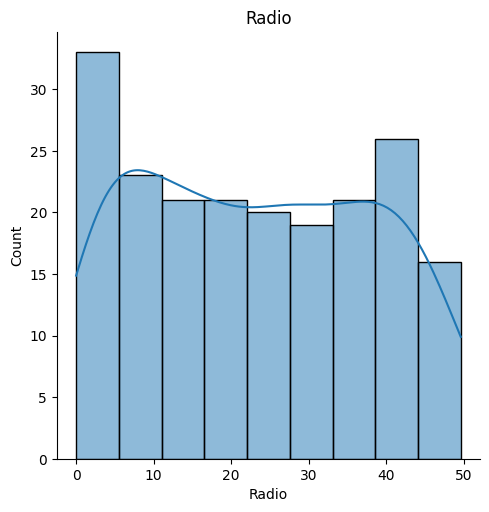

<Figure size 1000x600 with 0 Axes>

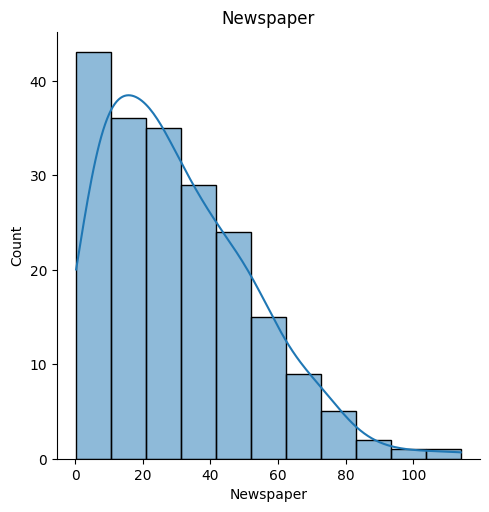

<Figure size 1000x600 with 0 Axes>

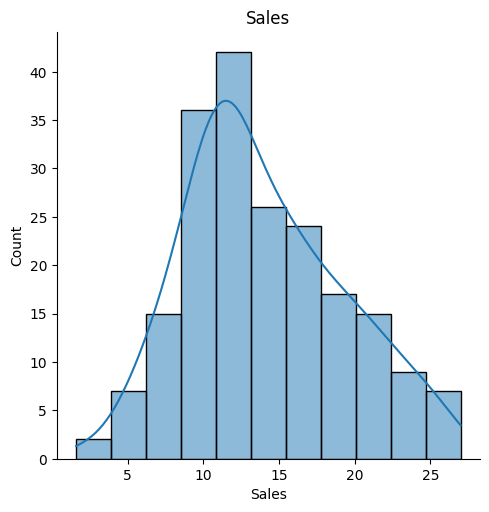

In [9]:
for i in data.columns:
    plt.figure(figsize=(10,6))
    sns.displot(data=data,x=i,kde=True)
    plt.title(i)
    plt.show()

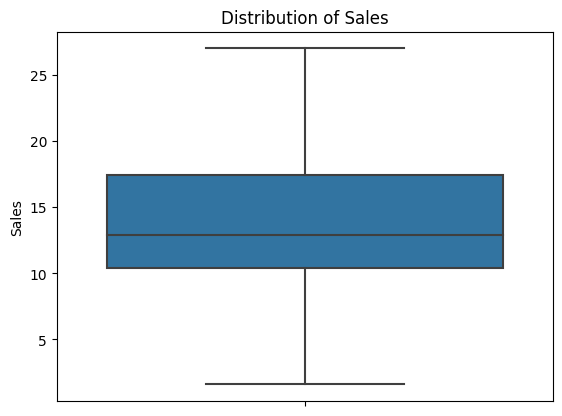

In [10]:
plt.title("Distribution of Sales")
sns.boxplot(y=data.Sales)
plt.show()

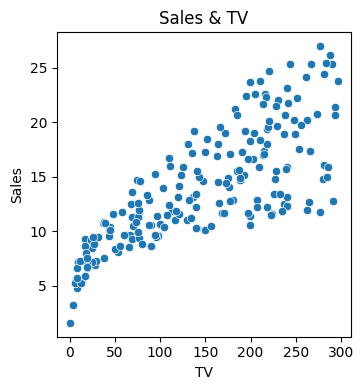

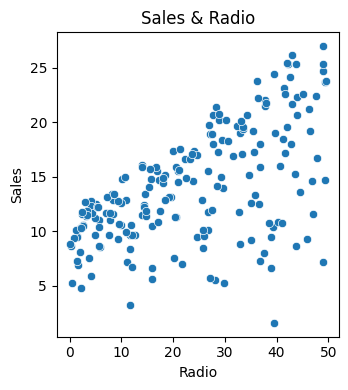

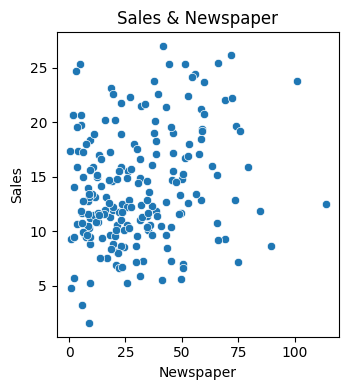

In [12]:
def scatter_plot(x,fig):
    plt.figure(figsize=(10,4))
    plt.subplot(1,3,fig)
    sns.scatterplot(data,x=data[x],y=data['Sales'])
    plt.title(f'Sales & {x}')
    plt.tight_layout()
    
scatter_plot('TV',1)
scatter_plot('Radio',2)
scatter_plot('Newspaper',3)
plt.show()

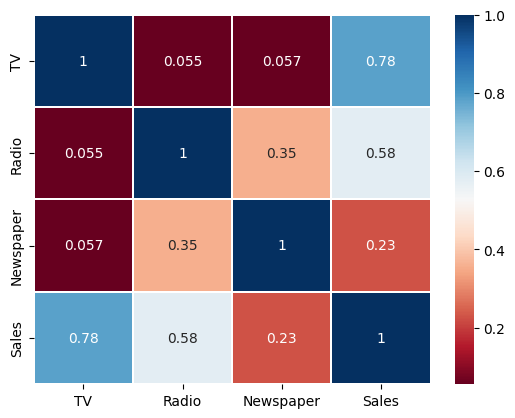

In [13]:
data_corr=data.corr()
sns.heatmap(data_corr,annot=True,cmap='RdBu',linewidths=0.1)
plt.show()

# Build Model

In [14]:
X=data.drop('Sales',axis=1)
y=data['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=44,shuffle=True)

# Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [17]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
linear_reg.score(X_train,y_train)

0.9064690217534378

In [19]:
linear_reg.score(X_test,y_test)

0.8359211261245153

In [20]:
y_pred_linear=linear_reg.predict(X_test)

In [21]:
print(list(y_pred_linear[:5]))
print(list(y_test[:5]))

[14.085599732054135, 10.004411391394221, 10.132792484682948, 19.562035380345172, 16.68853709801906]
[11.6, 11.0, 10.1, 18.9, 15.5]


In [22]:
# Calculate Error
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(y_test,y_pred_linear,multioutput='uniform_average')

MSE=mean_squared_error(y_test,y_pred_linear,multioutput='uniform_average')

print(f'mean_squared_error: {MSE}')
print(f"mean_absolute_error: {MAE}")

mean_squared_error: 2.784861739930595
mean_absolute_error: 1.2439460154326019


# Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(criterion="squared_error",max_depth=20,min_samples_split=4)

In [24]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=4)

In [25]:
tree_reg.score(X_train,y_train)

0.9965725724538615

In [26]:
tree_reg.score(X_test,y_test)

0.9106307781343502

In [27]:
tree_reg.feature_importances_

array([0.68152779, 0.31615034, 0.00232187])

In [28]:
y_pred_tree=tree_reg.predict(X_test)

In [29]:
print(list(y_pred_tree[:5]))
print(list(y_test[:5]))

[13.6, 10.766666666666666, 11.5, 20.233333333333334, 15.7]
[11.6, 11.0, 10.1, 18.9, 15.5]


In [30]:
# Calculate Error
MAE=mean_absolute_error(y_test,y_pred_tree,multioutput='uniform_average')

MSE=mean_squared_error(y_test,y_pred_tree,multioutput='uniform_average')

print(f'mean_squared_error: {MSE}')
print(f"mean_absolute_error: {MAE}")

mean_squared_error: 1.5168371212121208
mean_absolute_error: 0.9518939393939395
